In [1]:
import numpy as np
import collections as col
from wingstructure import structure

# Define materials

In [2]:
structure.material
Material = col.namedtuple('Material', ['ρ'])

fabric = structure.material.IsotropicMaterial(ρ=0.3e3, E=210e3, G=80e3)
foam = fabric

# Define structure

## import dat file

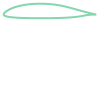

In [3]:
# load airfoil.dat file
coords = np.loadtxt('airfoils/ah93157.dat', skiprows=1)*1.2

# initialize base for section analysis
secbase = structure.SectionBase(coords)
secbase

## add structure elements

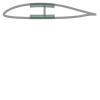

In [4]:
# create an outer layer from fabric with thickness 0.003 m
out = structure.Layer(secbase, fabric, 3e-3)

# create spar
spar = structure.ISpar(out, {'flange': fabric, 'web': fabric}, 0.5, 0.300, 3e-2, 0.6, 1e-3)
spar

In [5]:
from shapely import geometry as shpl_geom
bb = secbase.interior.bounds
cutbox = shpl_geom.box(bb[0], bb[1], spar.webpos_abs(), bb[3])

shell_center = out._centerline()

def opt_linemerge(geom):
    from shapely import ops
    if geom.type == 'MultiLineString':
        return ops.linemerge(geom)
    return geom

geom_left = opt_linemerge(shell_center.intersection(cutbox))
geom_right = opt_linemerge(shell_center.difference(cutbox))

mid_start = np.array(geom_left.coords[0])
mid_end = np.array(geom_left.coords[-1])

coords_mid = mid_start + np.outer((mid_end-mid_start), np.linspace(0,1,40)).T

np.array(geom_left.coords), np.array(geom_right.coords), coords_mid;

In [6]:
li = structure.section.LineIdealisation(spar)

# Analyse mass

In [7]:
massana = structure.MassAnalysis(spar)
massana.massproperties

(array([0.54128247, 0.0346968 ]), 13.748299126744147)